In [1]:
import pandas as pd
import numpy as np
import matplotlib
import matplotlib.pyplot as plt
import chardet as chd
%matplotlib inline

In [2]:
with open('Datos/billboard/billboard.xls', 'rb') as f:
    result = chd.detect(f.read())

In [3]:
result['encoding']

'ISO-8859-1'

In [4]:
billboard = pd.read_csv('Datos/billboard/billboard.xls', encoding=result['encoding'], low_memory=False)

In [5]:
billboard.head(3)

,year,artist.inverted,track,time,genre,date.entered,date.peaked,x1st.week,x2nd.week,x3rd.week,...,x67th.week,x68th.week,x69th.week,x70th.week,x71st.week,x72nd.week,x73rd.week,x74th.week,x75th.week,x76th.week
0,2000,Destiny's Child,Independent Women Part I,3:38,Rock,2000-09-23,2000-11-18,78,63.0,49.0,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
1,2000,Santana,"Maria, Maria",4:18,Rock,2000-02-12,2000-04-08,15,8.0,6.0,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
2,2000,Savage Garden,I Knew I Loved You,4:07,Rock,1999-10-23,2000-01-29,71,48.0,43.0,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN


In [6]:
billboard.columns

Index(['year', 'artist.inverted', 'track', 'time', 'genre', 'date.entered',
       'date.peaked', 'x1st.week', 'x2nd.week', 'x3rd.week', 'x4th.week',
       'x5th.week', 'x6th.week', 'x7th.week', 'x8th.week', 'x9th.week',
       'x10th.week', 'x11th.week', 'x12th.week', 'x13th.week', 'x14th.week',
       'x15th.week', 'x16th.week', 'x17th.week', 'x18th.week', 'x19th.week',
       'x20th.week', 'x21st.week', 'x22nd.week', 'x23rd.week', 'x24th.week',
       'x25th.week', 'x26th.week', 'x27th.week', 'x28th.week', 'x29th.week',
       'x30th.week', 'x31st.week', 'x32nd.week', 'x33rd.week', 'x34th.week',
       'x35th.week', 'x36th.week', 'x37th.week', 'x38th.week', 'x39th.week',
       'x40th.week', 'x41st.week', 'x42nd.week', 'x43rd.week', 'x44th.week',
       'x45th.week', 'x46th.week', 'x47th.week', 'x48th.week', 'x49th.week',
       'x50th.week', 'x51st.week', 'x52nd.week', 'x53rd.week', 'x54th.week',
       'x55th.week', 'x56th.week', 'x57th.week', 'x58th.week', 'x59th.week',
       '

In [7]:
billboard.dtypes

year                 int64
artist.inverted     object
track               object
time                object
genre               object
date.entered        object
date.peaked         object
x1st.week            int64
x2nd.week          float64
x3rd.week          float64
x4th.week          float64
x5th.week          float64
x6th.week          float64
x7th.week          float64
x8th.week          float64
x9th.week          float64
x10th.week         float64
x11th.week         float64
x12th.week         float64
x13th.week         float64
x14th.week         float64
x15th.week         float64
x16th.week         float64
x17th.week         float64
x18th.week         float64
x19th.week         float64
x20th.week         float64
x21st.week         float64
x22nd.week         float64
x23rd.week         float64
                    ...   
x47th.week         float64
x48th.week         float64
x49th.week         float64
x50th.week         float64
x51st.week         float64
x52nd.week         float64
x

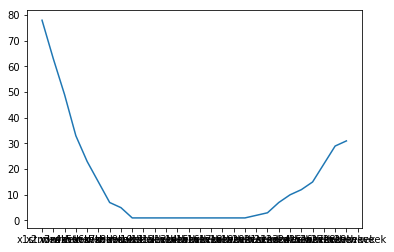

In [8]:
plt.plot(billboard.loc[0, 'x1st.week':'x76th.week'])

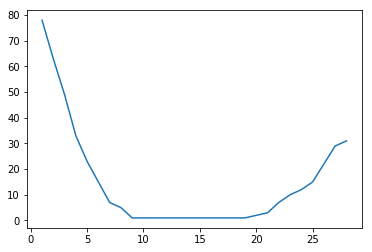

In [9]:
plt.plot(range(1, 77),billboard.loc[0, 'x1st.week':'x76th.week'])

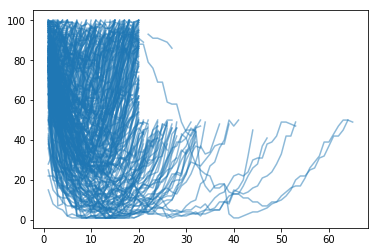

In [10]:
for index, row in billboard.iterrows():
    plt.plot(range(1, 77), row['x1st.week':'x76th.week'], color='C0', alpha=0.5)

In [11]:
bshort = billboard[['artist.inverted','track','time','date.entered','x1st.week','x2nd.week','x3rd.week']]

In [12]:
bshort.head(3)

,artist.inverted,track,time,date.entered,x1st.week,x2nd.week,x3rd.week
0,Destiny's Child,Independent Women Part I,3:38,2000-09-23,78,63.0,49.0
1,Santana,"Maria, Maria",4:18,2000-02-12,15,8.0,6.0
2,Savage Garden,I Knew I Loved You,4:07,1999-10-23,71,48.0,43.0


In [13]:
bshort.columns = ['artist', 'track', 'time', 'date.entered', 'wk1', 'wk2', 'wk3']

In [14]:
bshort.head(3)

,artist,track,time,date.entered,wk1,wk2,wk3
0,Destiny's Child,Independent Women Part I,3:38,2000-09-23,78,63.0,49.0
1,Santana,"Maria, Maria",4:18,2000-02-12,15,8.0,6.0
2,Savage Garden,I Knew I Loved You,4:07,1999-10-23,71,48.0,43.0


In [15]:
bmelt = bshort.melt(['artist', 'track', 'time', 'date.entered'], ['wk1', 'wk2', 'wk3'], 'week', 'rank')

In [16]:
bmelt.head(3)

,artist,track,time,date.entered,week,rank
0,Destiny's Child,Independent Women Part I,3:38,2000-09-23,wk1,78.0
1,Santana,"Maria, Maria",4:18,2000-02-12,wk1,15.0
2,Savage Garden,I Knew I Loved You,4:07,1999-10-23,wk1,71.0


In [17]:
bmelt.query('track=="Maria, Maria"')

,artist,track,time,date.entered,week,rank
1,Santana,"Maria, Maria",4:18,2000-02-12,wk1,15.0
318,Santana,"Maria, Maria",4:18,2000-02-12,wk2,8.0
635,Santana,"Maria, Maria",4:18,2000-02-12,wk3,6.0


In [18]:
bmelt['week'] = bmelt['week'].apply(lambda s: int(s[2]))

In [19]:
bmelt.head(3)

,artist,track,time,date.entered,week,rank
0,Destiny's Child,Independent Women Part I,3:38,2000-09-23,1,78.0
1,Santana,"Maria, Maria",4:18,2000-02-12,1,15.0
2,Savage Garden,I Knew I Loved You,4:07,1999-10-23,1,71.0


In [20]:
bmelt['date.entered'] = pd.to_datetime(bmelt['date.entered']) 

In [21]:
bmelt['date.entered'][0] + pd.Timedelta('7 days')

Timestamp('2000-09-30 00:00:00')

In [23]:
bmelt['date'] = bmelt['date.entered'] + pd.Timedelta('7 days') * (bmelt['week'] - 1)

In [25]:
bmelt.head(3)

,artist,track,time,date.entered,week,rank,date
0,Destiny's Child,Independent Women Part I,3:38,2000-09-23,1,78.0,2000-09-23
1,Santana,"Maria, Maria",4:18,2000-02-12,1,15.0,2000-02-12
2,Savage Garden,I Knew I Loved You,4:07,1999-10-23,1,71.0,1999-10-23


In [26]:
bmelt.drop(['date.entered'], axis = 1, inplace =True)

In [27]:
bmelt.query('track=="Maria, Maria"')

,artist,track,time,week,rank,date
1,Santana,"Maria, Maria",4:18,1,15.0,2000-02-12
318,Santana,"Maria, Maria",4:18,2,8.0,2000-02-19
635,Santana,"Maria, Maria",4:18,3,6.0,2000-02-26


In [34]:
bfinal = bmelt[['artist', 'track', 'time', 'date', 'week', 'rank']]

In [35]:
bfinal.sort_values(['artist', 'track'], inplace = True)

In [36]:
bfinal.head(3)

,artist,track,time,date,week,rank
246,2 Pac,Baby Don't Cry (Keep Ya Head Up II),4:22,2000-02-26,1,87.0
563,2 Pac,Baby Don't Cry (Keep Ya Head Up II),4:22,2000-03-04,2,82.0
880,2 Pac,Baby Don't Cry (Keep Ya Head Up II),4:22,2000-03-11,3,72.0


In [38]:
tracks = bfinal[['artist', 'track', 'time']].drop_duplicates()

In [40]:
tracks.head()

,artist,track,time
246,2 Pac,Baby Don't Cry (Keep Ya Head Up II),4:22
287,2Ge+her,The Hardest Part Of Breaking Up (Is Getting Ba...,3:15
24,3 Doors Down,Kryptonite,3:53
193,3 Doors Down,Loser,4:24
69,504 Boyz,Wobble Wobble,3:35


In [41]:
tracks.index.name = 'id'

In [42]:
tracksid = tracks.reset_index()

In [43]:
tracksid.head(3)

,id,artist,track,time
0,246,2 Pac,Baby Don't Cry (Keep Ya Head Up II),4:22
1,287,2Ge+her,The Hardest Part Of Breaking Up (Is Getting Ba...,3:15
2,24,3 Doors Down,Kryptonite,3:53


In [46]:
pd.merge(tracksid, bfinal, on=['track', 'artist']).head()

,id,artist,track,time_x,time_y,date,week,rank
0,246,2 Pac,Baby Don't Cry (Keep Ya Head Up II),4:22,4:22,2000-02-26,1,87.0
1,246,2 Pac,Baby Don't Cry (Keep Ya Head Up II),4:22,4:22,2000-03-04,2,82.0
2,246,2 Pac,Baby Don't Cry (Keep Ya Head Up II),4:22,4:22,2000-03-11,3,72.0
3,287,2Ge+her,The Hardest Part Of Breaking Up (Is Getting Ba...,3:15,3:15,2000-09-02,1,91.0
4,287,2Ge+her,The Hardest Part Of Breaking Up (Is Getting Ba...,3:15,3:15,2000-09-09,2,87.0


In [47]:
pd.merge(tracksid, bfinal, on=['track', 'artist', 'time']).head()

,id,artist,track,time,date,week,rank
0,246,2 Pac,Baby Don't Cry (Keep Ya Head Up II),4:22,2000-02-26,1,87.0
1,246,2 Pac,Baby Don't Cry (Keep Ya Head Up II),4:22,2000-03-04,2,82.0
2,246,2 Pac,Baby Don't Cry (Keep Ya Head Up II),4:22,2000-03-11,3,72.0
3,287,2Ge+her,The Hardest Part Of Breaking Up (Is Getting Ba...,3:15,2000-09-02,1,91.0
4,287,2Ge+her,The Hardest Part Of Breaking Up (Is Getting Ba...,3:15,2000-09-09,2,87.0


In [50]:
tidy = pd.merge(tracksid, bfinal, on=['track', 'artist', 'time']).drop(['artist', 'track', 'time'], axis = 1)

In [51]:
tidy.head()

,id,date,week,rank
0,246,2000-02-26,1,87.0
1,246,2000-03-04,2,82.0
2,246,2000-03-11,3,72.0
3,287,2000-09-02,1,91.0
4,287,2000-09-09,2,87.0


In [52]:
tidy.loc[tidy[tidy.week == 1]['rank'].idxmin()]

id                        1
date    2000-02-12 00:00:00
week                      1
rank                     15
Name: 756, dtype: object

In [53]:
tracksid.query('id == 1')

,id,artist,track,time
252,1,Santana,"Maria, Maria",4:18
